In [12]:
import pandas as pd

# import data for reviews on yelp dataset
reviews = pd.read_csv('../../yelp_academic/csv_data/yelp_academic_dataset_review.csv')

# visualize the data
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [13]:
# create a dictionary with information of the mean business rating
businesses = reviews.groupby('business_id').mean().reset_index()[['business_id', 'stars']]
businesses = dict(zip(businesses['business_id'].tolist(), businesses['stars'].tolist()))

# add mean stars to the reviews
reviews['mean_stars'] = reviews['business_id'].apply(lambda x: businesses.get(x))

# check new dataframe
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,mean_stars
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,3.068571
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,4.748344
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,3.458333
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,4.184211
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,4.114286


In [19]:
# select only reviews from users with more than 100 reviews
user_ids = reviews.groupby('user_id').count().reset_index()
user_ids = user_ids[user_ids['review_id'] >= 20]['user_id'].tolist()
reviews = reviews[reviews['user_id'].isin(user_ids)]

# create a dictionary with user mean deviation
users = reviews.groupby('user_id').mean().reset_index()[['user_id', 'stars', 'mean_stars']]
users['user_deviation'] = users['stars'] - users['mean_stars']
users = dict(zip(users['user_id'].tolist(), users['user_deviation'].tolist()))

# add mean stars to the reviews
reviews['user_deviation'] = reviews['user_id'].apply(lambda x: users.get(x))

# check new dataframe
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,mean_stars,user_deviation,naive_prediction
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,3.068571,0.387668,2.680904
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,3.458333,0.619737,2.838597
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,4.114286,-0.645882,4.760168
13,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0.0,0.0,0.0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14,3.500000,-0.332331,3.832331
14,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4.0,0.0,2.0,0.0,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05,3.894325,0.169877,3.724448


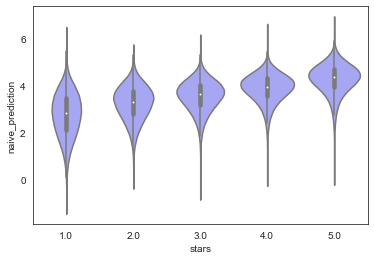

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the naive prediction for the stars
reviews['naive_prediction'] = reviews['mean_stars'] + reviews['user_deviation']

# plot the predictions vs the real stars
sns.set_style('white')
sns.violinplot(data=reviews, x='stars', y='naive_prediction', color=[0.6, 0.6, 1.0])
plt.savefig('figures/yelp_hidden_factors.png', dpi=200)
plt.show()

In [23]:
# understand good our predictions are
reviews[['stars', 'mean_stars', 'user_deviation', 'naive_prediction']].groupby('stars').describe()

mean_stars                                                              \
           count      mean       std       min       25%       50%       75%   
stars                                                                          
1.0     178598.0  3.054628  0.842041  1.000000  2.431604  3.153846  3.722222   
2.0     188371.0  3.398713  0.685911  1.025000  2.954545  3.502857  3.915493   
3.0     352206.0  3.578440  0.617547  1.033898  3.222222  3.671010  4.028986   
4.0     723702.0  3.800916  0.553475  1.136364  3.507937  3.890838  4.187500   
5.0     903748.0  4.054039  0.549929  1.037736  3.780000  4.138095  4.432836   

                user_deviation            ...                      \
            max          count      mean  ...       75%       max   
stars                                     ...                       
1.0    4.965000       178598.0 -0.296115  ...  0.102505  1.852479   
2.0    4.961538       188371.0 -0.152756  ...  0.147439  1.498276   
3.0    4.970297       352206.0 -0.024856  ...  0.215050  1.960236   
4.0    4.989899       723702.0  0.079746  ...  0.296587  1.960236   
5.0    5.000000       903748.0  0.218568  ...  0.473784  1.960236   

      naive_prediction                                                    \
                 count      mean       std       min       25%       50%   
stars                                                                      
1.0           178598.0  2.758513  0.942209 -1.288526  2.110665  2.811739   
2.0           188371.0  3.245957  0.738714 -0.255892  2.765660  3.308104   
3.0           352206.0  3.553584  0.652810 -0.751690  3.153553  3.615526   
4.0           723702.0  3.880662  0.599224 -0.192169  3.534708  3.942418   
5.0           903748.0  4.272607  0.636374 -0.141526  3.916667  4.336896   

                           
            75%       max  
stars                      
1.0    3.456518  6.308175  
2.0    3.777870  5.607567  
3.0    4.014194  6.055835  
4.0    4.295102  6.531665  
5.0    4.705423  6.852479  

[5 rows x 24 columns]